# Next Improvement

- It will test on SET100 list

In [51]:
# load data 

import pandas as pd
from datetime import datetime

df = pd.read_csv('stocksm_atoatcs_202304071240.csv')

print(df.shape)

(321344, 18)


In [52]:
df.head(5)

,_id,Symbol,VolATO1,PriceATO1,Close(T_1),VolATO2,PriceATO2,Price12_30,VolATC,PriceATC,Price16_30,PercentChgSS1,ValueSS1,PercentChgSS2,ValueSS2,PercentChgATC,ValueATC,updated_at
0,1,ADVANC,0,0.00,0.00,0,0.00,0.00,2192000,188.00,188.50,0.00,0,0.00,0,-0.27,412096000,2021-08-31
1,2,AFC,0,0.00,0.00,0,0.00,0.00,100,10.80,10.80,0.00,0,0.00,0,0.00,1080,2021-08-31
2,3,AHC,0,0.00,0.00,0,0.00,0.00,2000,16.60,16.30,0.00,0,0.00,0,1.84,33200,2021-08-31
3,4,AJ,0,0.00,0.00,0,0.00,0.00,104200,19.70,19.70,0.00,0,0.00,0,0.00,2052740,2021-08-31
4,5,ALUCON,0,0.00,0.00,0,0.00,0.00,100,180.00,180.00,0.00,0,0.00,0,0.00,18000,2021-08-31


In [53]:
df.isna().sum()

_id              0
Symbol           0
VolATO1          0
PriceATO1        0
Close(T_1)       0
VolATO2          0
PriceATO2        0
Price12_30       0
VolATC           0
PriceATC         0
Price16_30       0
PercentChgSS1    0
ValueSS1         0
PercentChgSS2    0
ValueSS2         0
PercentChgATC    0
ValueATC         0
updated_at       0
dtype: int64

In [54]:
# Select SET100 stock

set100 = ['AAV',
'ACE',
'ADVANC',
'AMATA',
'AOT',
'AP',
'AWC',
'BAM',
'BANPU',
'BBL',
'BCH',
'BCP',
'BCPG',
'BDMS',
'BEC',
'BEM',
'BGRIM',
'BH',
'BLA',
'BTS',
'BYD',
'CBG',
'CENTEL',
'CHG',
'CK',
'CKP',
'COM7',
'CPALL',
'CPF',
'CPN',
'CRC',
'DELTA',
'DOHOME',
'EA',
'EGCO',
'EPG',
'ESSO',
'FORTH',
'GLOBAL',
'GPSC',
'GULF',
'GUNKUL',
'HANA',
'HMPRO',
'INTUCH',
'IRPC',
'IVL',
'JAS',
'JMART',
'JMT',
'KBANK',
'KCE',
'KEX',
'KKP',
'KTB',
'KTC',
'LH',
'MEGA',
'MINT',
'MTC',
'NEX',
'ONEE',
'OR',
'ORI',
'OSP',
'PLANB',
'PSL',
'PTG',
'PTT',
'PTTEP',
'PTTGC',
'QH',
'RATCH',
'RBF',
'RCL',
'SABUY',
'SAWAD',
'SCB',
'SCC',
'XD',
'SCGP',
'SINGER',
'SIRI',
'SJWD',
'SPALI',
'SPRC',
'STA',
'STGT',
'TCAP',
'THANI',
'THG',
'TIDLOR',
'TIPH',
'TISCO',
'TOP',
'TQM',
'TRUE',
'TTB',
'TU',
'VGI',
'WHA'
]

set100_df = df[df['Symbol'].isin(set100)]
set100_df.head()

,_id,Symbol,VolATO1,PriceATO1,Close(T_1),VolATO2,PriceATO2,Price12_30,VolATC,PriceATC,Price16_30,PercentChgSS1,ValueSS1,PercentChgSS2,ValueSS2,PercentChgATC,ValueATC,updated_at
0,1,ADVANC,0,0.00,0.00,0,0.00,0.00,2192000,188.00,188.50,0.00,0,0.00,0,-0.27,412096000,2021-08-31
10,11,AMATA,0,0.00,0.00,0,0.00,0.00,959300,18.80,18.70,0.00,0,0.00,0,0.53,18034840,2021-08-31
11,12,AP,0,0.00,0.00,0,0.00,0.00,3543600,8.40,8.35,0.00,0,0.00,0,0.60,29766240,2021-08-31
16,17,AOT,0,0.00,0.00,0,0.00,0.00,6842500,63.75,63.75,0.00,0,0.00,0,0.00,436209375,2021-08-31
23,24,TOP,0,0.00,0.00,0,0.00,0.00,3641000,49.75,49.75,0.00,0,0.00,0,0.00,181139750,2021-08-31


In [55]:
# Select necesary column

set100_select = set100_df[['Symbol','PriceATO1','PriceATO2','PriceATC','updated_at']]
set100_select = set100_select.sort_values(['Symbol','updated_at'])
set100_select.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at
430,AAV,0.00,0.00,2.78,2021-08-31
1247,AAV,2.70,2.74,2.70,2021-09-03
2062,AAV,0.00,2.70,2.70,2021-09-07
2877,AAV,2.68,2.68,2.70,2021-09-08
3692,AAV,2.68,2.70,2.70,2021-09-09


### Cleaning data

In [56]:
# drop the 0 value row
set100_clean = set100_select[(set100_select['PriceATO1'] != 0) & (set100_select['PriceATO2'] != 0) & (set100_select['PriceATC'] != 0)]
set100_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at
1247,AAV,2.70,2.74,2.70,2021-09-03
2877,AAV,2.68,2.68,2.70,2021-09-08
3692,AAV,2.68,2.70,2.70,2021-09-09
4507,AAV,2.72,2.66,2.66,2021-09-10
7225,AAV,2.74,2.74,2.70,2021-09-20


In [57]:
# Check duplicates

duplicates = set100_clean.duplicated(subset=['updated_at', 'Symbol'], keep=False)
duplicate_rows = set100_clean[duplicates]
duplicate_rows.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at
11314,AAV,2.82,2.78,2.70,2021-09-30
12119,AAV,2.82,2.78,2.70,2021-09-30
12924,AAV,2.82,2.78,2.70,2021-09-30
13729,AAV,2.72,2.72,2.74,2021-10-01
14534,AAV,2.72,2.72,2.74,2021-10-01


In [58]:
# Drop duplicates

set100_clean = set100_clean.drop_duplicates()
set100_clean

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at
1247,AAV,2.70,2.74,2.70,2021-09-03
2877,AAV,2.68,2.68,2.70,2021-09-08
3692,AAV,2.68,2.70,2.70,2021-09-09
4507,AAV,2.72,2.66,2.66,2021-09-10
7225,AAV,2.74,2.74,2.70,2021-09-20
...,...,...,...,...,...
317007,WHA,4.10,4.20,4.22,2023-03-23
317869,WHA,4.22,4.22,4.20,2023-03-24
319593,WHA,4.26,4.26,4.26,2023-03-28
320455,WHA,4.26,4.26,4.26,2023-03-29


## Create percent change column 

In [59]:
# today_close and tomorrow_open

set100_clean['chg_Ct_Ot1'] =  round((set100_clean['PriceATO1'].shift(-1)-set100_clean['PriceATC'])/set100_clean['PriceATC'],4)


set100_clean

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1
1247,AAV,2.70,2.74,2.70,2021-09-03,-0.01
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01
3692,AAV,2.68,2.70,2.70,2021-09-09,0.01
4507,AAV,2.72,2.66,2.66,2021-09-10,0.03
7225,AAV,2.74,2.74,2.70,2021-09-20,0.00
...,...,...,...,...,...,...
317007,WHA,4.10,4.20,4.22,2023-03-23,0.00
317869,WHA,4.22,4.22,4.20,2023-03-24,0.01
319593,WHA,4.26,4.26,4.26,2023-03-28,0.00
320455,WHA,4.26,4.26,4.26,2023-03-29,0.00


In [60]:
# Put NaN value to the last row of each group

import numpy as np

# Group by Symbol and set the last row 'chg_Ct_Ot1' to np.nan
set100_clean.loc[set100_clean.groupby('Symbol').tail(1).index, 'chg_Ct_Ot1'] = np.nan
set100_clean

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1
1247,AAV,2.70,2.74,2.70,2021-09-03,-0.01
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01
3692,AAV,2.68,2.70,2.70,2021-09-09,0.01
4507,AAV,2.72,2.66,2.66,2021-09-10,0.03
7225,AAV,2.74,2.74,2.70,2021-09-20,0.00
...,...,...,...,...,...,...
317007,WHA,4.10,4.20,4.22,2023-03-23,0.00
317869,WHA,4.22,4.22,4.20,2023-03-24,0.01
319593,WHA,4.26,4.26,4.26,2023-03-28,0.00
320455,WHA,4.26,4.26,4.26,2023-03-29,0.00


In [61]:
# Open jump (Today open compare with yesterday close)

set100_clean['today_jump'] = set100_clean['chg_Ct_Ot1'].shift(1)

set100_clean

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1,today_jump
1247,AAV,2.70,2.74,2.70,2021-09-03,-0.01,NaN
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,-0.01
3692,AAV,2.68,2.70,2.70,2021-09-09,0.01,-0.01
4507,AAV,2.72,2.66,2.66,2021-09-10,0.03,0.01
7225,AAV,2.74,2.74,2.70,2021-09-20,0.00,0.03
...,...,...,...,...,...,...,...
317007,WHA,4.10,4.20,4.22,2023-03-23,0.00,0.00
317869,WHA,4.22,4.22,4.20,2023-03-24,0.01,0.00
319593,WHA,4.26,4.26,4.26,2023-03-28,0.00,0.01
320455,WHA,4.26,4.26,4.26,2023-03-29,0.00,0.00


In [62]:
# today_close and today_open

set100_clean['chg_Ct_Ot'] = round((set100_clean['PriceATC']-set100_clean['PriceATO1'])/set100_clean['PriceATO1'],4)

set100_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1,today_jump,chg_Ct_Ot
1247,AAV,2.70,2.74,2.70,2021-09-03,-0.01,NaN,0.00
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,-0.01,0.01
3692,AAV,2.68,2.70,2.70,2021-09-09,0.01,-0.01,0.01
4507,AAV,2.72,2.66,2.66,2021-09-10,0.03,0.01,-0.02
7225,AAV,2.74,2.74,2.70,2021-09-20,0.00,0.03,-0.01


In [63]:
# percent change of Price ATO2 to Price ATO1

set100_clean['P_chg_ATO2_ATO1'] = round(((set100_clean['PriceATO2']-set100_clean['PriceATO1'])/set100_clean['PriceATO1']),4)

set100_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1
1247,AAV,2.70,2.74,2.70,2021-09-03,-0.01,NaN,0.00,0.01
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,-0.01,0.01,0.00
3692,AAV,2.68,2.70,2.70,2021-09-09,0.01,-0.01,0.01,0.01
4507,AAV,2.72,2.66,2.66,2021-09-10,0.03,0.01,-0.02,-0.02
7225,AAV,2.74,2.74,2.70,2021-09-20,0.00,0.03,-0.01,0.00


In [64]:
# percent change of Price ATC to Price ATO2

set100_clean['P_chg_ATC_ATO2'] = round(((set100_clean['PriceATC']-set100_clean['PriceATO2'])/set100_clean['PriceATO2']),4)
set100_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,chg_Ct_Ot1,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2
1247,AAV,2.70,2.74,2.70,2021-09-03,-0.01,NaN,0.00,0.01,-0.01
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,-0.01,0.01,0.00,0.01
3692,AAV,2.68,2.70,2.70,2021-09-09,0.01,-0.01,0.01,0.01,0.00
4507,AAV,2.72,2.66,2.66,2021-09-10,0.03,0.01,-0.02,-0.02,0.00
7225,AAV,2.74,2.74,2.70,2021-09-20,0.00,0.03,-0.01,0.00,-0.01


In [65]:
# Drop column

del set100_clean['chg_Ct_Ot1']

In [66]:
# Drop NaN

set100_clean = set100_clean.dropna()
set100_clean.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,0.01,0.00,0.01
3692,AAV,2.68,2.70,2.70,2021-09-09,-0.01,0.01,0.01,0.00
4507,AAV,2.72,2.66,2.66,2021-09-10,0.01,-0.02,-0.02,0.00
7225,AAV,2.74,2.74,2.70,2021-09-20,0.03,-0.01,0.00,-0.01
8044,AAV,2.70,2.74,2.76,2021-09-21,0.00,0.02,0.01,0.01


In [67]:
# Check na value

set100_clean.isna().sum()

Symbol             0
PriceATO1          0
PriceATO2          0
PriceATC           0
updated_at         0
today_jump         0
chg_Ct_Ot          0
P_chg_ATO2_ATO1    0
P_chg_ATC_ATO2     0
dtype: int64

### Parameter

- `Symbol` : Stock symbol
- `PriceATO1` : Morning opening price
- `PriceATO2` : Afternoon opening price
- `PriceATC` : Today closing price
- `updated_at` : Day of trading 
- `chg_Ct_Ot` : Percent change between today closing price and today opening price 
- `today_jump` : Percent change between today morning opening price and yesterday closing price 
- `P_chg_ATO2_ATO1` : Percent change between Afternoon price from Morning price 
- `P_chg_ATC_ATO2` : Percent change between Closing price and Afternoon opening price 

## First of all, I will focus only ATO2 >= ATO1 because we gonna get profit from buy low sell high

In [68]:
# Afternoon rising from morning opening

up_data = set100_clean[set100_clean['P_chg_ATO2_ATO1'] >= 0]
up_data.head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,0.01,0.00,0.01
3692,AAV,2.68,2.70,2.70,2021-09-09,-0.01,0.01,0.01,0.00
7225,AAV,2.74,2.74,2.70,2021-09-20,0.03,-0.01,0.00,-0.01
8044,AAV,2.70,2.74,2.76,2021-09-21,0.00,0.02,0.01,0.01
13729,AAV,2.72,2.72,2.74,2021-10-01,0.01,0.01,0.00,0.01


C:\Users\USER\AppData\Local\Temp\ipykernel_11176\2120418954.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(up_data.corr(),annot=True,cmap='hot')


<Axes: >

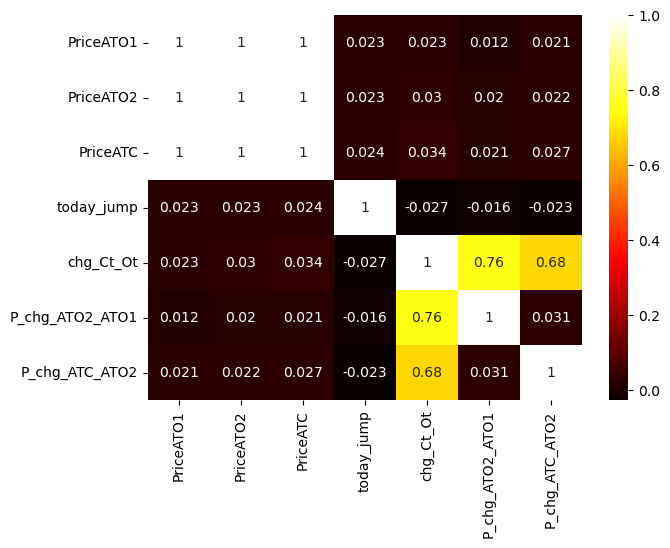

In [69]:
# Correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(up_data.corr(),annot=True,cmap='hot')

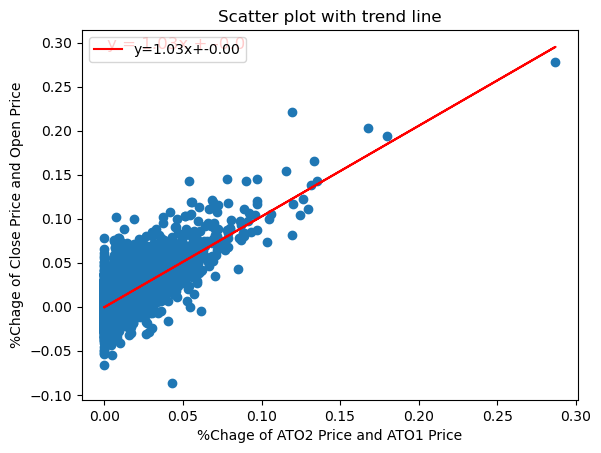

In [70]:
import numpy as np
from scipy import stats

# Create a scatter plot
plt.scatter(up_data['P_chg_ATO2_ATO1'], up_data['chg_Ct_Ot'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(up_data['P_chg_ATO2_ATO1'], up_data['chg_Ct_Ot'])

# Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add trend line
plt.plot(up_data['P_chg_ATO2_ATO1'], intercept + slope*up_data['P_chg_ATO2_ATO1'], 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

# Set the x and y axis labels
plt.xlabel('%Chage of ATO2 Price and ATO1 Price')
plt.ylabel('%Chage of Close Price and Open Price')

# Set the plot title and legend
plt.title('Scatter plot with trend line')
plt.legend()

# Add equation to the plot
plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='r')

# Show the plot
plt.show()


# Machine learning

In [71]:
# Import library

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [72]:
# X = feature variables, y = a target variable

X = up_data[['P_chg_ATO2_ATO1','today_jump']]
y = up_data['chg_Ct_Ot']

print(X.shape)
print(y.shape)

(19986, 2)
(19986,)


In [73]:
# split data 80% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (15988, 2)
y_train: (15988,)
X_test:  (3998, 2)
y_test:  (3998,)


### Model fitting

In [74]:
# Model fitting

# Linear regression
li_model = LinearRegression()
li_model.fit(X_train, y_train)


LinearRegression()

### Model evaluation

In [75]:
# Model evaluation

# Linear regression
pred_li_test = li_model.predict(X_test)
rmse_li = mean_squared_error(y_test, pred_li_test, squared=False).round(4)
test_r2_li = li_model.score(X_test, y_test).round(4)
print(f"RMSE from Linear model : {rmse_li}")
print(f"R-squared from Linear model : {test_r2_li}")


RMSE from Linear model : 0.0096
R-squared from Linear model : 0.5559


#### However, R-squared still low (0.55)

In [76]:
# Check variable importance 

# create a DataFrame to store the feature coefficients and absolute values
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': abs(li_model.coef_)})

# sort the coefficients by absolute value
coef_df = coef_df.sort_values('Coefficient', ascending=False)

# print the sorted coefficients
print(coef_df)

           Feature  Coefficient
0  P_chg_ATO2_ATO1         1.04
1       today_jump         0.02


In [77]:
# get the coefficients of the fitted model
b0 = li_model.intercept_
b1, b2 = li_model.coef_

# print the equation of the fitted model
print(f'2 feature linear equation y = {b0:.4f} + {b1:.4f} * "P_chg_ATO2_ATO1" + {b2:.4f} * "today_jump"')

2 feature linear equation y = -0.0004 + 1.0380 * "P_chg_ATO2_ATO1" + -0.0177 * "today_jump"


## So I will backtesting the strategy

Buy on ATO2 when
- Afternoon opening price >= Morning opening price (`P_chg_ATO2_ATO1` >= 0) and
- When we calculate y = -0.0004 + 1.0380 * `P_chg_ATO2_ATO1` + -0.0177 * `today_jump`
- Must  "y - `P_chg_ATO2_ATO1`" > comission (0.3%)

Sell on today ATC

In [78]:
# Create predict % change of ATC from ATO1

set100_clean.loc[:, 'Pred_chg_Ct_Ot'] = -0.0004 + 1.0380 * set100_clean['P_chg_ATO2_ATO1'] -0.0177 * set100_clean['today_jump']

set100_clean.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11176\2875646072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set100_clean.loc[:, 'Pred_chg_Ct_Ot'] = -0.0004 + 1.0380 * set100_clean['P_chg_ATO2_ATO1'] -0.0177 * set100_clean['today_jump']


,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,0.01,0.00,0.01,-0.00
3692,AAV,2.68,2.70,2.70,2021-09-09,-0.01,0.01,0.01,0.00,0.01
4507,AAV,2.72,2.66,2.66,2021-09-10,0.01,-0.02,-0.02,0.00,-0.02
7225,AAV,2.74,2.74,2.70,2021-09-20,0.03,-0.01,0.00,-0.01,-0.00
8044,AAV,2.70,2.74,2.76,2021-09-21,0.00,0.02,0.01,0.01,0.01


In [79]:
# Expect gain

set100_clean.loc[:,'expect_gain'] = set100_clean['Pred_chg_Ct_Ot'] - set100_clean['P_chg_ATO2_ATO1']
set100_clean.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11176\2999771343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set100_clean.loc[:,'expect_gain'] = set100_clean['Pred_chg_Ct_Ot'] - set100_clean['P_chg_ATO2_ATO1']


,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot,expect_gain
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,0.01,0.00,0.01,-0.00,-0.00
3692,AAV,2.68,2.70,2.70,2021-09-09,-0.01,0.01,0.01,0.00,0.01,0.00
4507,AAV,2.72,2.66,2.66,2021-09-10,0.01,-0.02,-0.02,0.00,-0.02,-0.00
7225,AAV,2.74,2.74,2.70,2021-09-20,0.03,-0.01,0.00,-0.01,-0.00,-0.00
8044,AAV,2.70,2.74,2.76,2021-09-21,0.00,0.02,0.01,0.01,0.01,0.00


In [80]:
# Create action ticker by 1 = action, 0 = not action

import numpy as np

set100_clean['action'] = np.where((set100_clean['P_chg_ATO2_ATO1'] >= 0) & (set100_clean['expect_gain'] > 0.003), 1, 0)
set100_clean.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11176\1104472610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set100_clean['action'] = np.where((set100_clean['P_chg_ATO2_ATO1'] >= 0) & (set100_clean['expect_gain'] > 0.003), 1, 0)


,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,today_jump,chg_Ct_Ot,P_chg_ATO2_ATO1,P_chg_ATC_ATO2,Pred_chg_Ct_Ot,expect_gain,action
2877,AAV,2.68,2.68,2.70,2021-09-08,-0.01,0.01,0.00,0.01,-0.00,-0.00,0
3692,AAV,2.68,2.70,2.70,2021-09-09,-0.01,0.01,0.01,0.00,0.01,0.00,0
4507,AAV,2.72,2.66,2.66,2021-09-10,0.01,-0.02,-0.02,0.00,-0.02,-0.00,0
7225,AAV,2.74,2.74,2.70,2021-09-20,0.03,-0.01,0.00,-0.01,-0.00,-0.00,0
8044,AAV,2.70,2.74,2.76,2021-09-21,0.00,0.02,0.01,0.01,0.01,0.00,0


In [81]:
# Check trading or not

set100_clean['action'].value_counts()

0    34788
1       28
Name: action, dtype: int64

In [82]:
# Arrange date and drop unnecesary column

bt_data = set100_clean.sort_values(['updated_at','Symbol']).drop(['today_jump','chg_Ct_Ot','P_chg_ATO2_ATO1','P_chg_ATC_ATO2','Pred_chg_Ct_Ot','expect_gain'],axis=1)
bt_data

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,action
2877,AAV,2.68,2.68,2.70,2021-09-08,0
3036,ACE,4.10,4.08,4.12,2021-09-08,0
2461,AMATA,18.40,18.10,18.20,2021-09-08,0
2467,AOT,63.25,62.00,62.75,2021-09-08,0
2462,AP,8.20,8.10,8.15,2021-09-08,0
...,...,...,...,...,...,...
321259,TRUE,8.45,8.40,8.25,2023-03-30,0
321268,TTB,1.45,1.45,1.45,2023-03-30,0
321274,TU,14.60,14.40,14.30,2023-03-30,0
321305,VGI,3.94,3.90,3.94,2023-03-30,0


In [83]:
#I will create the maximum money per trade by assuming an equal number of 
# trades per unit of time and taking the average of the total buy signals on that day.
# Use 90% of equity (prepare for comission)

equity = 1000000
max_use = equity*0.9
grouped = bt_data.groupby('updated_at')['action'].sum()

bt_data['Max_moneytrade'] = bt_data.apply(lambda row: max_use/grouped[row['updated_at']] if row['action'] == 1 else 0, axis=1)
bt_data[bt_data['action']==1].head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,action,Max_moneytrade
50760,SABUY,15.30,17.20,16.90,2021-11-25,1,900000.00
57594,TIPH,57.25,64.50,64.25,2021-12-08,1,900000.00
58637,NEX,13.90,16.40,16.60,2021-12-13,1,900000.00
68772,BYD,17.50,19.20,19.60,2021-12-29,1,900000.00
100546,FORTH,23.60,26.75,27.50,2022-02-25,1,900000.00


In [84]:
# Creat trade volume

bt_data['trade_vol'] = round(bt_data['Max_moneytrade']/bt_data['PriceATO2'], -2)
bt_data[bt_data['action']==1].head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,action,Max_moneytrade,trade_vol
50760,SABUY,15.30,17.20,16.90,2021-11-25,1,900000.00,52300.00
57594,TIPH,57.25,64.50,64.25,2021-12-08,1,900000.00,14000.00
58637,NEX,13.90,16.40,16.60,2021-12-13,1,900000.00,54900.00
68772,BYD,17.50,19.20,19.60,2021-12-29,1,900000.00,46900.00
100546,FORTH,23.60,26.75,27.50,2022-02-25,1,900000.00,33600.00


In [85]:
# Create Buy amount include buy commision 0.15%

bt_data['buy_amount'] = bt_data['trade_vol']*bt_data['PriceATO2']*1.0015
bt_data[bt_data['action']==1].head()


,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,action,Max_moneytrade,trade_vol,buy_amount
50760,SABUY,15.30,17.20,16.90,2021-11-25,1,900000.00,52300.00,900909.34
57594,TIPH,57.25,64.50,64.25,2021-12-08,1,900000.00,14000.00,904354.50
58637,NEX,13.90,16.40,16.60,2021-12-13,1,900000.00,54900.00,901710.54
68772,BYD,17.50,19.20,19.60,2021-12-29,1,900000.00,46900.00,901830.72
100546,FORTH,23.60,26.75,27.50,2022-02-25,1,900000.00,33600.00,900148.20


In [86]:
# Create sell amount include sell commision 0.15%

bt_data['sell_amount'] = bt_data['trade_vol']*bt_data['PriceATC']*0.9985
bt_data[bt_data['action']==1].head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,action,Max_moneytrade,trade_vol,buy_amount,sell_amount
50760,SABUY,15.30,17.20,16.90,2021-11-25,1,900000.00,52300.00,900909.34,882544.19
57594,TIPH,57.25,64.50,64.25,2021-12-08,1,900000.00,14000.00,904354.50,898150.75
58637,NEX,13.90,16.40,16.60,2021-12-13,1,900000.00,54900.00,901710.54,909972.99
68772,BYD,17.50,19.20,19.60,2021-12-29,1,900000.00,46900.00,901830.72,917861.14
100546,FORTH,23.60,26.75,27.50,2022-02-25,1,900000.00,33600.00,900148.20,922614.00


In [87]:
# Create Profit Loss column

bt_data['P/L'] = bt_data['sell_amount']-bt_data['buy_amount']
bt_data[bt_data['action']==1].head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,action,Max_moneytrade,trade_vol,buy_amount,sell_amount,P/L
50760,SABUY,15.30,17.20,16.90,2021-11-25,1,900000.00,52300.00,900909.34,882544.19,-18365.15
57594,TIPH,57.25,64.50,64.25,2021-12-08,1,900000.00,14000.00,904354.50,898150.75,-6203.75
58637,NEX,13.90,16.40,16.60,2021-12-13,1,900000.00,54900.00,901710.54,909972.99,8262.45
68772,BYD,17.50,19.20,19.60,2021-12-29,1,900000.00,46900.00,901830.72,917861.14,16030.42
100546,FORTH,23.60,26.75,27.50,2022-02-25,1,900000.00,33600.00,900148.20,922614.00,22465.80


In [88]:
# Create percent profit loss

bt_data['pct_P/L'] = round((bt_data['P/L']/bt_data['buy_amount']),4)
bt_data[bt_data['action']==1].head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,action,Max_moneytrade,trade_vol,buy_amount,sell_amount,P/L,pct_P/L
50760,SABUY,15.30,17.20,16.90,2021-11-25,1,900000.00,52300.00,900909.34,882544.19,-18365.15,-0.02
57594,TIPH,57.25,64.50,64.25,2021-12-08,1,900000.00,14000.00,904354.50,898150.75,-6203.75,-0.01
58637,NEX,13.90,16.40,16.60,2021-12-13,1,900000.00,54900.00,901710.54,909972.99,8262.45,0.01
68772,BYD,17.50,19.20,19.60,2021-12-29,1,900000.00,46900.00,901830.72,917861.14,16030.42,0.02
100546,FORTH,23.60,26.75,27.50,2022-02-25,1,900000.00,33600.00,900148.20,922614.00,22465.80,0.03


In [89]:
# Create balance column

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Calculate the balance column
bt_data['balance'] = equity + bt_data['P/L'].cumsum()

bt_data[bt_data['action']==1].head()

,Symbol,PriceATO1,PriceATO2,PriceATC,updated_at,action,Max_moneytrade,trade_vol,buy_amount,sell_amount,P/L,pct_P/L,balance
50760,SABUY,15.30,17.20,16.90,2021-11-25,1,900000.00,52300.00,900909.34,882544.19,-18365.15,-0.02,981634.85
57594,TIPH,57.25,64.50,64.25,2021-12-08,1,900000.00,14000.00,904354.50,898150.75,-6203.75,-0.01,975431.10
58637,NEX,13.90,16.40,16.60,2021-12-13,1,900000.00,54900.00,901710.54,909972.99,8262.45,0.01,983693.56
68772,BYD,17.50,19.20,19.60,2021-12-29,1,900000.00,46900.00,901830.72,917861.14,16030.42,0.02,999723.98
100546,FORTH,23.60,26.75,27.50,2022-02-25,1,900000.00,33600.00,900148.20,922614.00,22465.80,0.03,1022189.78


In [90]:
# Profit or loss

profit_loss = round(bt_data['P/L'].sum(),2)
pcr_PL = round((profit_loss/equity),4)
print('Profit/Loss :',profit_loss)
print('%P/L :',pcr_PL*100,'%')

Profit/Loss : 116413.2
%P/L : 11.64 %


In [91]:
# standard deviation

import numpy as np

sd = round((np.std(bt_data['pct_P/L'])),4)
print('Standard Deviation :',sd*100,'%')

Standard Deviation : 2.67 %


In [92]:
# Shape ratio
# Thailand Treasury Bill 2.5%

shape_rt = round(((pcr_PL - 0.025)/sd),2)
print('Shape ratio :',shape_rt)

Shape ratio : 3.42


In [93]:
# Total trade

total_trade = bt_data[bt_data['action']==1]['action'].sum()
print('Total trade :',total_trade)

Total trade : 28


In [94]:
# Max drawdown

# Calculate the cumulative maximum of the balance column
cummax = bt_data['balance'].cummax()

# Calculate the drawdown series
drawdown = (bt_data['balance'] - cummax) / cummax

# Calculate the maximum drawdown
max_drawdown = round(drawdown.min(),4)

# Print the maximum drawdown
print(f'Maximum drawdown: {max_drawdown*100}%')

Maximum drawdown: -6.909999999999999%


In [95]:
# Calculate the gains and losses
gains = bt_data[bt_data['P/L'] > 0]['P/L']
losses = bt_data[bt_data['P/L'] < 0]['P/L']

# Calculate the average gain and average loss
avg_gain = round(gains.mean(),2)
avg_loss = round(losses.mean(),2)

# Print the results
print('Average gain:', avg_gain)
print('Average loss:', avg_loss)

Average gain: 19892.86
Average loss: -13998.43


In [96]:
# Calculate the percent gains and losses
pct_gains = bt_data[bt_data['pct_P/L'] > 0]['pct_P/L']
pct_losses = bt_data[bt_data['pct_P/L'] < 0]['pct_P/L']

# Calculate the average gain and average loss
pct_avg_gain = round(pct_gains.mean(),4)*100
pct_avg_loss = round(pct_losses.mean(),4)*100

# Print the results
print('Percent Average gain:', pct_avg_gain,'%')
print('Percent Average loss:', pct_avg_loss,'%')

Percent Average gain: 2.1999999999999997 %
Percent Average loss: -1.55 %


In [97]:
# Percent win loss

# Calculate the number of winning and losing trades
winning_trades = len(bt_data[bt_data['P/L'] > 0])
losing_trades = len(bt_data[bt_data['P/L'] < 0])

# Calculate the total number of trades
total_trades = bt_data[bt_data['action']==1]['action'].sum()

# Calculate the percentage of winning and losing trades
percent_win = round((winning_trades / total_trades * 100),2)
percent_loss = round((losing_trades / total_trades * 100),2)

# Print the results
print('Percent win:', percent_win,'%')
print('Percent loss:', percent_loss,'%')

Percent win: 53.57 %
Percent loss: 46.43 %


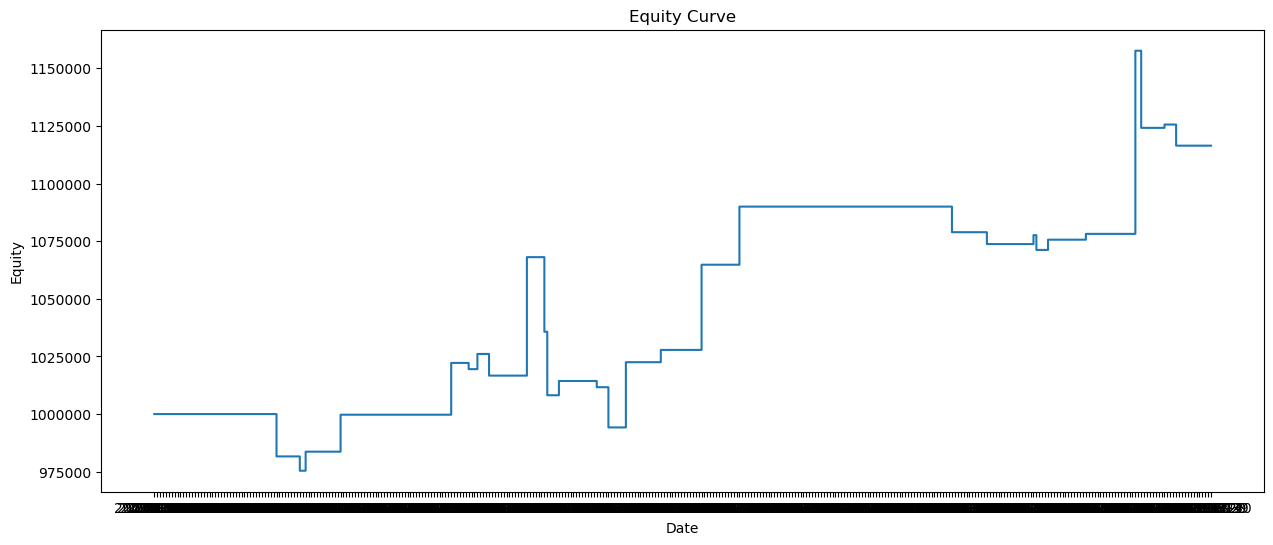

In [98]:
# Equity plot

import matplotlib.pyplot as plt

# set the figure size
fig, ax = plt.subplots(figsize=(15, 6))

# plot the balance curve
ax.plot(bt_data['updated_at'], bt_data['balance'])

# set x-axis label
ax.set_xlabel('Date')

# set y-axis label
ax.set_ylabel('Equity')

# set y-axis tick format to display full numbers
ax.ticklabel_format(style='plain', axis='y')

# set plot title
ax.set_title('Equity Curve')

# display the plot
plt.show()



In [110]:
# Trade data

trade_df = bt_data[bt_data['action']==1]

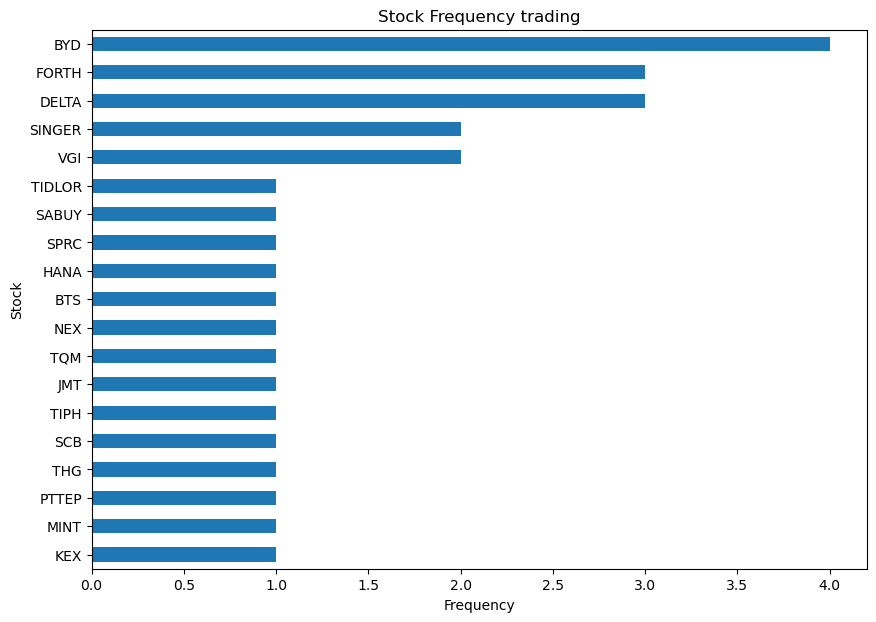

In [100]:
# Stock Frequency trading

import pandas as pd
import matplotlib.pyplot as plt

# get value counts of symbols and sort them in descending order
symbol_counts = trade_df['Symbol'].value_counts().sort_values(ascending=True)

# plot histogram bar chart with horizontal bars and adjust figure size
plt.figure(figsize=(10,7))
symbol_counts.plot.barh()

# set x-axis label
plt.xlabel('Frequency')

# set y-axis label
plt.ylabel('Stock')

# set plot title
plt.title('Stock Frequency trading')

# display the plot
plt.show()


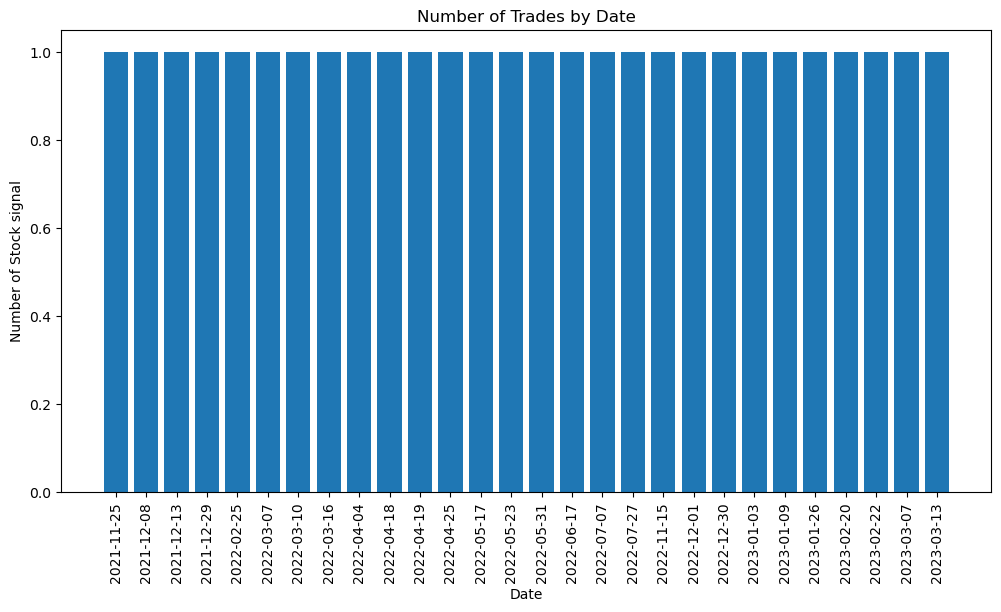

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# get the value count of 'updated_at'
date_counts = trade_df['updated_at'].value_counts()

# sort the counts by date
date_counts = date_counts.sort_index()

# create the bar chart with a wider figure size
plt.figure(figsize=(12, 6))
plt.bar(date_counts.index, date_counts.values)

# set the title and labels
plt.title('Number of Trades by Date')
plt.xlabel('Date')
plt.ylabel('Number of Stock signal')

# set the x-axis ticks to be vertical
plt.xticks(rotation=90)

# display the chart
plt.show()

# Conclusion

- Afternoon opening buying and Selling closed on the same day strategy for stocks in SET100 list.
- Buy on ATO2 when
- Afternoon opening price >= Morning opening price (`P_chg_ATO2_ATO1` >= 0) and
- When we calculate y = -0.0004 + 1.0380 * `P_chg_ATO2_ATO1` + -0.0177 * `today_jump`
- Must  "y - `P_chg_ATO2_ATO1`" > comission (0.3%)
- Sell on today ATC
- I will create the maximum amount of money per trade by assuming an equal number of trades per unit of time
- Taking the average of the total buy signals on that day. 
- I will then use 90% of the equity (keeping 10% aside for commissions).

Result

- **Profit/Loss : 116,413.2**
- Standard Deviation : 2.67 %
- Shape ratio : 3.42
- Total trade : 28
- Maximum drawdown: -6.9%
- Average gain: 19,892.86
- Average loss: -13,998.43
- Percent Average gain: 2.2 %
- Percent Average loss: -1.55 %
- Percent win: 53.57 %
- Percent loss: 46.43 %